# ÁîªÂÉèÁîüÊàê AI ÂÖ•ÈñÄ: Python „Å´„Çà„ÇãÊã°Êï£„É¢„Éá„É´„ÅÆÁêÜË´ñ„Å®ÂÆüË∑µ
## Section 07. Play with Diffusion Model

Stable Diffusion „Çí‰∏≠ÂøÉ„Å®„Åó„ÅüÊã°Êï£„É¢„Éá„É´„ÇíÁî®„ÅÑ„Å¶„ÄÅÊúÄÂÖàÁ´Ø„ÅÆÁîªÂÉèÁîüÊàêÊäÄË°ì„ÇíÂÆüÈöõ„Å´Âãï„Åã„Åó„Å¶ÂÆüË∑µ„Åó„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ

### Lecture 24. Prompt-to-Prompt

Prompt-to-Prompt [[Hertz+ ICLR'23]](https://arxiv.org/abs/2208.01626) „ÇíÁî®„ÅÑ„Å¶ Stable Diffusion „ÅßÁîüÊàê„Åó„ÅüÁîªÂÉè„ÅÆÁ∑®ÈõÜ„ÇíÂÆüÁèæ„Åó„Åæ„Åô„ÄÇ

## „Çª„ÉÉ„Éà„Ç¢„ÉÉ„Éó

### GPU „Åå‰ΩøÁî®„Åß„Åç„Çã„ÅãÁ¢∫Ë™ç

Êú¨ Colab „Éé„Éº„Éà„Éñ„ÉÉ„ÇØ„ÇíÂÆüË°å„Åô„Çã„Åü„ÇÅ„Å´ GPU „É©„É≥„Çø„Ç§„É†„Çí‰ΩøÁî®„Åó„Å¶„ÅÑ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç„Åó„Åæ„Åô„ÄÇCPU „É©„É≥„Çø„Ç§„É†„Å®ÊØî„Åπ„Å¶ÁîªÂÉèÁîüÊàê„Åå„Çà„ÇäÊó©„Åè„Å™„Çä„Åæ„Åô„ÄÇ‰ª•‰∏ã„ÅÆ `nvidia-smi` „Ç≥„Éû„É≥„Éâ„ÅåÂ§±Êïó„Åô„ÇãÂ†¥Âêà„ÅØÂÜçÂ∫¶Ë¨õÁæ©Ë≥áÊñô„ÅÆ `GPU ‰ΩøÁî®Ë®≠ÂÆö` „ÅÆ„Çπ„É©„Ç§„ÉâË™¨Êòé„ÇÑ Google Colab „ÅÆ [FAQ](https://research.google.com/colaboratory/faq.html#gpu-utilization) Á≠â„ÇíÂèÇËÄÉ„Å´„É©„É≥„Çø„Ç§„É†„Çø„Ç§„Éó„ÅåÊ≠£„Åó„ÅèÂ§âÊõ¥„Åï„Çå„Å¶„ÅÑ„Çã„ÅãÁ¢∫Ë™ç„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

In [ ]:
!nvidia-smi

Mon Jul 24 11:11:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Âà©Áî®„Åô„Çã Python „É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Çπ„Éà„Éº„É´

diffusers „É©„Ç§„Éñ„É©„É™„Çí„Ç§„É≥„Çπ„Éà„Éº„É´„Åô„Çã„Åì„Å®„ÅßÊã°Êï£„É¢„Éá„É´„ÇíÁ∞°Âçò„Å´‰ΩøÁî®„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åó„Åæ„Åô„ÄÇdiffusers „É©„Ç§„Éñ„É©„É™„ÇíÂãï„Åã„Åô‰∏ä„ÅßÂøÖË¶Å„Å®„Å™„Çã„É©„Ç§„Éñ„É©„É™„ÇÇËøΩÂä†„Åß„Ç§„É≥„Çπ„Éà„Éº„É´„Åó„Åæ„Åô:
- [transformers](https://github.com/huggingface/transformers): Êã°Êï£„É¢„Éá„É´„Å´„Åä„ÅÑ„Å¶Ê†∏„Å®„Å™„Çã Transformer „É¢„Éá„É´„ÅåÂÆöÁæ©„Åï„Çå„Å¶„ÅÑ„Çã„É©„Ç§„Éñ„É©„É™
- [accelerate](https://github.com/huggingface/accelerate): transformers „Å®ÈÄ£Êê∫„Åó„Å¶„Çà„ÇäÈ´òÈÄü„Å™ÁîªÂÉèÁîüÊàê„Çí„Çµ„Éù„Éº„Éà„Åô„Çã„É©„Ç§„Éñ„É©„É™

In [ ]:
!pip install diffusers==0.4.1
!pip install transformers accelerate

## Prompt-to-Prompt „Å´„Çà„Çã Cross Attention „ÅÆÂà∂Âæ°

Êú¨„Çª„ÇØ„Ç∑„Éß„É≥„Åß„ÅØ Stable Diffusion „Çí„Éô„Éº„Çπ„Å´„ÄÅprompt-to-prompt „Å´„Çà„Çã cross attention „ÅÆÂà∂Âæ°„Å´Èñ¢„Åô„ÇãÂãï‰Ωú„ÇíÁ¢∫Ë™ç„Åó„Åæ„Åô„ÄÇ

„Åæ„ÅöÊ∫ñÂÇô„Å®„Åó„Å¶ÁîªÂÉè„ÇíË§áÊï∞ÁîüÊàê„Åó„ÅüÂ†¥Âêà„Å´ÁµêÊûú„ÇíÁ¢∫Ë™ç„Åó„ÇÑ„Åô„ÅÑ„Çà„ÅÜ„Å´„ÄÅÁîªÂÉè„Çí„Ç∞„É™„ÉÉ„Éâ‰∏ä„Å´Ë°®Á§∫„Åô„ÇãÈñ¢Êï∞„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ„Åì„ÅÆÈñ¢Êï∞„ÅØ [ü§ó Hugging Face Stable Diffusion](https://huggingface.co/blog/stable_diffusion) „ÅÆ„Éñ„É≠„Ç∞Ë®ò‰∫ã„ÅÆ„ÇÇ„ÅÆ„ÇíÂà©Áî®„Åó„Å¶„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
from typing import List
from PIL import Image
from PIL.Image import Image as PilImage

def image_grid(imgs: List[PilImage], rows: int, cols: int) -> PilImage:
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

‰ª•‰∏ã„ÄÅ[Improving Generative Images with Instructions: Prompt-to-Prompt Image Editing with Cross Attention Control - wandb ü™Ñüêù](https://wandb.ai/wandb/cross-attention-control/reports/Improving-Generative-Images-with-Instructions-Prompt-to-Prompt-Image-Editing-with-Cross-Attention-Control--VmlldzoyNjk2MDAy) „ÇíÂèÇËÄÉ„Å´Âãï‰Ωú„ÇíËøΩ„Å£„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ„Åæ„ÅöÂàù„ÇÅ„Å´ Stable Diffusion „ÇíÊßãÊàê„Åô„Çã„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„ÇíË™≠„ÅøËæº„Çì„Åß„ÅÑ„Åç„Åæ„Åô„ÄÇ„Å™„ÅäÊú¨ notebook „Åß„ÅØ `runwayml/stable-diffusion-v1-5` „Çí‰ΩøÁî®„Åó„Åæ„Åô„ÄÇ

In [ ]:
import torch
from transformers import CLIPModel, CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel

# CLIP tokenizer „Å® text encoder „ÅÆË™≠„ÅøËæº„Åø
model_path_clip = "openai/clip-vit-large-patch14"
clip_tokenizer = CLIPTokenizer.from_pretrained(model_path_clip)
clip_model = CLIPModel.from_pretrained(model_path_clip, torch_dtype=torch.float16)
clip = clip_model.text_model

# StableDiffusion „ÅÆ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„ÅÆË™≠„ÅøËæº„Åø
model_path_diffusion = "runwayml/stable-diffusion-v1-5"
unet = UNet2DConditionModel.from_pretrained(model_path_diffusion, subfolder="unet", revision="fp16", torch_dtype=torch.float16)
vae = AutoencoderKL.from_pretrained(model_path_diffusion, subfolder="vae", revision="fp16", torch_dtype=torch.float16)

# ÂêÑ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„Çí„Åù„Çå„Åû„Çå GPU „Å∏ÁßªÂãï
device = "cuda"
unet.to(device)
vae.to(device)
clip.to(device)

print("Loaded all models")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Loaded all models


Cross attention „ÇíÂà∂Âæ°„Åô„Çã„Åü„ÇÅ„ÅÆÈñ¢Êï∞„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åó„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ

In [ ]:
from typing import Tuple

def init_attention_weights(weight_tuples: List[Tuple[int, int]]) -> None:
    tokens_length = clip_tokenizer.model_max_length
    weights = torch.ones(tokens_length)

    for i, w in weight_tuples:
        if i < tokens_length and i >= 0:
            weights[i] = w

    for name, module in unet.named_modules():
        module_name = type(module).__name__
        if module_name == "CrossAttention" and "attn2" in name:
            module.last_attn_slice_weights = weights.to(device)
        if module_name == "CrossAttention" and "attn1" in name:
            module.last_attn_slice_weights = None

Ê¨°„Å´„Ç™„É™„Ç∏„Éä„É´„ÅÆ„Éó„É≠„É≥„Éó„Éà„Å®Á∑®ÈõÜÂæå„ÅÆ„Éó„É≠„É≥„Éó„Éà„ÅÆÂ∑ÆÂàÜ„Åã„Çâ cross attention „ÇíÂà∂Âæ°„Åô„ÇãÈñ¢Êï∞„ÇíÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ

In [ ]:
from difflib import SequenceMatcher
from transformers.tokenization_utils_base import BatchEncoding

def init_attention_edit(tokens: BatchEncoding, tokens_edit: BatchEncoding):

    tokens_length = clip_tokenizer.model_max_length
    mask = torch.zeros(tokens_length)
    indices_target = torch.arange(tokens_length, dtype=torch.long)
    indices = torch.zeros(tokens_length, dtype=torch.long)

    tokens = tokens.input_ids.numpy()[0]
    tokens_edit = tokens_edit.input_ids.numpy()[0]

    for name, a0, a1, b0, b1 in SequenceMatcher(None, tokens, tokens_edit).get_opcodes():
        if b0 < tokens_length:
            if name == "equal" or (name == "replace" and a1-a0 == b1-b0):
                mask[b0:b1] = 1
                indices[b0:b1] = indices_target[a0:a1]

    for name, module in unet.named_modules():
        module_name = type(module).__name__
        if module_name == "CrossAttention" and "attn2" in name:
            module.last_attn_slice_mask = mask.to(device)
            module.last_attn_slice_indices = indices.to(device)
        if module_name == "CrossAttention" and "attn1" in name:
            module.last_attn_slice_mask = None
            module.last_attn_slice_indices = None

Stable Diffusion „ÅÆ UNet „Å´„Åä„Åë„Çã cross attention „ÅÆË®àÁÆó„Çí‰ª•‰∏ã„ÅÆÈñ¢Êï∞„ÅßÂ∑Æ„ÅóÊõø„Åà„Åæ„Åô„ÄÇ

In [ ]:
def init_attention_func():
    #ORIGINAL SOURCE CODE: https://github.com/huggingface/diffusers/blob/91ddd2a25b848df0fa1262d4f1cd98c7ccb87750/src/diffusers/models/attention.py#L276
    def new_attention(
        self,
        query: torch.Tensor,
        key: torch.Tensor,
        value: torch.Tensor
    ) -> torch.Tensor:

        # TODO: use baddbmm for better performance
        attention_scores = torch.matmul(query, key.transpose(-1, -2)) * self.scale
        attn_slice = attention_scores.softmax(dim=-1)
        # compute attention output

        if self.use_last_attn_slice:
            if self.last_attn_slice_mask is not None:
                new_attn_slice = torch.index_select(self.last_attn_slice, -1, self.last_attn_slice_indices)
                attn_slice = attn_slice * (1 - self.last_attn_slice_mask) + new_attn_slice * self.last_attn_slice_mask
            else:
                attn_slice = self.last_attn_slice

            self.use_last_attn_slice = False

        if self.save_last_attn_slice:
            self.last_attn_slice = attn_slice
            self.save_last_attn_slice = False

        if self.use_last_attn_weights and self.last_attn_slice_weights is not None:
            attn_slice = attn_slice * self.last_attn_slice_weights
            self.use_last_attn_weights = False

        hidden_states = torch.matmul(attn_slice, value)
        # reshape hidden_states
        hidden_states = self.reshape_batch_dim_to_heads(hidden_states)
        return hidden_states

    def new_sliced_attention(
        self,
        query: torch.Tensor,
        key: torch.Tensor,
        value: torch.Tensor,
        sequence_length: int,
        dim: int
    ) -> torch.Tensor:

        batch_size_attention = query.shape[0]
        hidden_states = torch.zeros(
            (batch_size_attention, sequence_length, dim // self.heads), device=query.device, dtype=query.dtype
        )
        slice_size = self._slice_size if self._slice_size is not None else hidden_states.shape[0]
        for i in range(hidden_states.shape[0] // slice_size):
            start_idx = i * slice_size
            end_idx = (i + 1) * slice_size
            attn_slice = (
                torch.matmul(query[start_idx:end_idx], key[start_idx:end_idx].transpose(1, 2)) * self.scale
            )  # TODO: use baddbmm for better performance
            attn_slice = attn_slice.softmax(dim=-1)

            if self.use_last_attn_slice:
                if self.last_attn_slice_mask is not None:
                    new_attn_slice = torch.index_select(self.last_attn_slice, -1, self.last_attn_slice_indices)
                    attn_slice = attn_slice * (1 - self.last_attn_slice_mask) + new_attn_slice * self.last_attn_slice_mask
                else:
                    attn_slice = self.last_attn_slice

                self.use_last_attn_slice = False

            if self.save_last_attn_slice:
                self.last_attn_slice = attn_slice
                self.save_last_attn_slice = False

            if self.use_last_attn_weights and self.last_attn_slice_weights is not None:
                attn_slice = attn_slice * self.last_attn_slice_weights
                self.use_last_attn_weights = False

            attn_slice = torch.matmul(attn_slice, value[start_idx:end_idx])

            hidden_states[start_idx:end_idx] = attn_slice

        # reshape hidden_states
        hidden_states = self.reshape_batch_dim_to_heads(hidden_states)
        return hidden_states

    for name, module in unet.named_modules():
        module_name = type(module).__name__
        if module_name == "CrossAttention":
            module.last_attn_slice = None
            module.use_last_attn_slice = False
            module.use_last_attn_weights = False
            module.save_last_attn_slice = False
            module._sliced_attention = new_sliced_attention.__get__(module, type(module))
            module._attention = new_attention.__get__(module, type(module))

Êõ¥„Å´‰∏äË®ò„ÅßÂ∑Æ„ÅóÊõø„Åà„Åü cross attention „Å´Á¥∞„Åã„ÅèÂà∂Âæ°„ÇíÂèØËÉΩ„Å´„Åô„ÇãÂ±ûÊÄßÂÄ§„ÇíÂ∞éÂÖ•„Åó„Å¶„ÅÑ„Åç„Åæ„Åô„ÄÇ

In [ ]:
def use_last_tokens_attention(use: bool = True) -> None:
    for name, module in unet.named_modules():
        module_name = type(module).__name__
        if module_name == "CrossAttention" and "attn2" in name:
            module.use_last_attn_slice = use

def use_last_tokens_attention_weights(use: bool = True) -> None:
    for name, module in unet.named_modules():
        module_name = type(module).__name__
        if module_name == "CrossAttention" and "attn2" in name:
            module.use_last_attn_weights = use

def use_last_self_attention(use: bool = True) -> None:
    for name, module in unet.named_modules():
        module_name = type(module).__name__
        if module_name == "CrossAttention" and "attn1" in name:
            module.use_last_attn_slice = use

def save_last_tokens_attention(save: bool = True) -> None:
    for name, module in unet.named_modules():
        module_name = type(module).__name__
        if module_name == "CrossAttention" and "attn2" in name:
            module.save_last_attn_slice = save

def save_last_self_attention(save: bool = True) -> None:
    for name, module in unet.named_modules():
        module_name = type(module).__name__
        if module_name == "CrossAttention" and "attn1" in name:
            module.save_last_attn_slice = save

‰∏äË®ò„ÅßÂÆöÁæ©„Åó„ÅüÈñ¢Êï∞„ÇíÁµÑ„ÅøËæº„Çì„Å† Prompt-to-Prompt „ÇíÂÆüÁèæ„Åô„ÇãÈñ¢Êï∞„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ

In [ ]:
import random

import numpy as np

from typing import Optional

from diffusers import LMSDiscreteScheduler
from tqdm.auto import tqdm

@torch.no_grad()
def stable_diffusion(
    # „Ç™„É™„Ç∏„Éä„É´„ÅÆ„Éó„É≠„É≥„Éó„Éà
    prompt: str ="",
    # Á∑®ÈõÜÂæå„ÅÆ„Éó„É≠„É≥„Éó„Éà
    prompt_edit: Optional[str] = None,

    # Á∑®ÈõÜÂæå„ÅÆ„Éó„É≠„É≥„Éó„Éà„Å´„Åä„Åë„ÇãÂêÑ„Éà„Éº„ÇØ„É≥„ÅÆÈáç„Åø„ÅÆÊåáÂÆö
    prompt_edit_token_weights: Optional[List[Tuple[int, int]]] = None,

    # ÊúÄÂàù„ÅÆ„Éó„É≠„É≥„Éó„Éà„Å´ÂØæ„Åô„ÇãÂΩ±ÈüøÂ∫¶Âêà„ÅÑ
    # Â±ÄÊâÄÁöÑ„Å™ÁâπÂæ¥ÔºàÁ¥∞„Åã„Å™Ë©≥Á¥∞„ÇÑ„ÉÜ„ÇØ„Çπ„ÉÅ„É£Ôºâ„ÇíÂà∂Âæ°
    prompt_edit_tokens_start: float = 0.0,
    # Â§ßÂüüÁöÑ„Å™ÁâπÂæ¥ÔºàÂ§ßÈõëÊää„Å™ÁâπÂæ¥„ÇÑ‰∏ÄËà¨ÁöÑ„Å™„Ç∑„Éº„É≥ÊßãÊàêÔºâ„ÇíÂà∂Âæ°
    prompt_edit_tokens_end: float = 1.0,

    # „Ç™„É™„Ç∏„Éä„É´„ÅÆ„Éó„É≠„É≥„Éó„Éà„Åã„ÇâÁîüÊàê„Åï„Çå„ÅüÁîªÂÉè„Å´ÂØæ„Åô„ÇãÂΩ±ÈüøÂ∫¶Âêà„ÅÑ
    # Â±ÄÊâÄÁöÑ„Å™ÁâπÂæ¥„ÇíÂà∂Âæ°
    prompt_edit_spatial_start: float = 0.0,
    # Â§ßÂüüÁöÑ„Å™ÁâπÂæ¥„ÇíÂà∂Âæ°
    prompt_edit_spatial_end: float =1.0,

    # „Åù„ÅÆ‰ªñ„ÄÅtext2image „ÅÆ„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøÁæ§
    guidance_scale: float = 7.5,
    steps: int = 50,
    seed: Optional[str] = None,
    width: int = 512,
    height: int = 512,
    init_image: Optional[PilImage] = None,
    init_image_strength: float = 0.5
) -> PilImage:
    # Á∑®ÈõÜÂæå„ÅÆ„Éó„É≠„É≥„Éó„Éà„Å´„Åä„Åë„Çã„Éà„Éº„ÇØ„É≥„ÅÆÈáç„Åø„ÅåÊåáÂÆö„Åï„Çå„Å¶„ÅÑ„Å™„ÅÑÂ†¥Âêà„ÅØ
    # Á©∫„ÅÆ„É™„Çπ„Éà„ÅßÂàùÊúüÂåñ„Åó„Å¶„Åä„Åè
    if prompt_edit_token_weights is None:
        prompt_edit_token_weights = []

    # „É¢„Éá„É´ÂÜÖÈÉ®„ÅßÁîªÂÉè„Çµ„Ç§„Ç∫„ÅÆ‰∏ç‰∏ÄËá¥Èò≤„Åê„Åü„ÇÅ„Å´
    # Stable Diffusion „Å´Âêà„ÅÜ„Çà„ÅÜÁîüÊàêÁîªÂÉè„ÅÆ„Çµ„Ç§„Ç∫„Çí 64 „ÅÆÂÄçÊï∞„Å´Â§âÊõ¥„Åô„Çã
    width = width - width % 64
    height = height - height % 64

    # ‰π±Êï∞„ÅÆ seed „ÅåÊåáÂÆö„Åï„Çå„Å¶„ÅÑ„Å™„ÅÑ (= None) „ÅÆÂ†¥Âêà
    # seed „Çí„É©„É≥„ÉÄ„É†„Å´Ë®≠ÂÆö„Åó„Å¶Âõ∫ÂÆö„Åô„Çã
    if seed is None: seed = random.randrange(2**32 - 1)
    generator = torch.cuda.manual_seed(seed)

    # „Éé„Ç§„Ç∫„Çπ„Ç±„Ç∏„É•„Éº„É©„ÇíË®≠ÂÆö„Åô„Çã
    scheduler = LMSDiscreteScheduler(
        beta_start=0.00085,
        beta_end=0.012,
        beta_schedule="scaled_linear",
        num_train_timesteps=1000
    )
    scheduler.set_timesteps(steps)

    # === image2image Êù°‰ª∂‰∏ã„ÅÆÂ†¥Âêà ===
    # ÂàùÊúüÁä∂ÊÖã„Å®„Åó„Å¶ÁîªÂÉè„ÅåÂÖ•Âäõ„Åï„Çå„ÅüÂ†¥Âêà„Å´ÂâçÂá¶ÁêÜ„ÇíË°å„ÅÜ
    if init_image is not None:
        # ÁîªÂÉè„Çí„É™„Çµ„Ç§„Ç∫„Åó„Å¶„ÉÜ„É≥„ÇΩ„É´„Å´„Åó„Å§„Å§„ÄÅ
        # „Åù„ÅÆ„ÉÜ„É≥„ÇΩ„É´„ÅÆÂΩ¢„ÇíÂ§âÊõ¥: numpy (b, h, w, c) -> torch (b, c, h, w)
        init_image = init_image.resize((width, height), resample=Image.Resampling.LANCZOS)
        init_image = np.array(init_image).astype(np.float32) / 255.0 * 2.0 - 1.0
        init_image = torch.from_numpy(init_image[np.newaxis, ...].transpose(0, 3, 1, 2))

        # RGB „ÅÆ 3 „ÉÅ„É£„É≥„Éç„É´‰ª•‰∏ä„ÅÇ„ÇãÂ†¥ÂêàÔºà‰æã: „Ç¢„É´„Éï„Ç°„ÉÅ„É£„É≥„Éç„É´Ôºâ„ÄÅ
        # ‰ªäÂõû‰ΩøÁî®„Åó„Å¶„ÅÑ„Çã Stable Diffusion „ÇíÂê´„ÇÅÂ§ö„Åè„ÅÆÊã°Êï£„É¢„Éá„É´„ÅØ
        # „Ç¢„É´„Éï„Ç°„ÉÅ„É£„É≥„Éç„É´„Çí„Çµ„Éù„Éº„Éà„Åó„Å¶„ÅÑ„Å™„ÅÑ„Åü„ÇÅ„ÄÅ„Ç¢„É´„Éï„Ç°„ÉÅ„É£„É≥„Éç„É´„ÅÆ
        # ‰∏çÈÄèÊòéÂ∫¶„ÇíËÄÉÊÖÆ„Åó„Å¶ÂÖÉ„ÄÖ„ÅÆ„ÉÅ„É£„É≥„Éç„É´„Å´ÂêàÊàê
        if init_image.shape[1] > 3:
            init_image = init_image[:, :3] * init_image[:, 3:] + (1 - init_image[:, 3:])

        # ÁîªÂÉè„ÉÜ„É≥„ÇΩ„É´„Çí GPU „Å∏ÁßªÂãï
        init_image = init_image.to(device)

        # ÁîªÂÉè„ÉÜ„É≥„ÇΩ„É´„ÇíÂÖÉ„Å´„ÄÅÊΩúÂú®„Éá„Éº„Çø„Çí„Çµ„É≥„Éó„É™„É≥„Ç∞
        with torch.autocast(device):
            init_latent = vae.encode(init_image).latent_dist.sample(generator=generator) * 0.18215

        t_start = steps - int(steps * init_image_strength)

    # === image2image Êù°‰ª∂‰∏ã„Åß„ÅØ„Å™„ÅÑÂ†¥Âêà ===
    else:
        init_latent = torch.zeros((1, unet.in_channels, height // 8, width // 8), device=device)
        t_start = 0

    # „Ç¨„Ç¶„Çπ„Éé„Ç§„Ç∫„ÇíÁîüÊàê
    noise = torch.randn(init_latent.shape, generator=generator, device=device)
    # latent = noise * scheduler.init_noise_sigma
    latent = scheduler.add_noise(init_latent, noise, torch.tensor([scheduler.timesteps[t_start]], device=device)).to(device)

    # CLIP text encoder „Å´„Çà„ÇãÊù°‰ª∂‰ªò„Åë„ÅÆË®àÁÆó
    with torch.autocast(device):
        tokens_unconditional = clip_tokenizer(
            text="",
            padding="max_length",
            max_length=clip_tokenizer.model_max_length,
            truncation=True,
            return_tensors="pt",
            return_overflowing_tokens=True
        )
        embedding_unconditional = clip(
            tokens_unconditional.input_ids.to(device)
        ).last_hidden_state

        tokens_conditional = clip_tokenizer(
            text=prompt,
            padding="max_length",
            max_length=clip_tokenizer.model_max_length,
            truncation=True,
            return_tensors="pt",
            return_overflowing_tokens=True
        )
        embedding_conditional = clip(
            tokens_conditional.input_ids.to(device)
        ).last_hidden_state

        # „Éó„É≠„É≥„Éó„ÉàÁ∑®ÈõÜ„Å´„Çà„ÇãÊù°‰ª∂‰ªò„Åë„ÅÆË®àÁÆó
        if prompt_edit is not None:
            tokens_conditional_edit = clip_tokenizer(
                text=prompt_edit,
                padding="max_length",
                max_length=clip_tokenizer.model_max_length,
                truncation=True,
                return_tensors="pt",
                return_overflowing_tokens=True
            )
            embedding_conditional_edit = clip(
                tokens_conditional_edit.input_ids.to(device)
            ).last_hidden_state

            init_attention_edit(tokens_conditional, tokens_conditional_edit)

        init_attention_func()
        init_attention_weights(prompt_edit_token_weights)

        timesteps = scheduler.timesteps[t_start:]

        # === denoising step ===
        for i, t in tqdm(enumerate(timesteps), total=len(timesteps)):
            t_index = t_start + i

            latent_model_input = latent
            latent_model_input = scheduler.scale_model_input(latent_model_input, t)

            # „Éé„Ç§„Ç∫„ÅÆÊÆãÂ∑Æ„Çí‰∫àÊ∏¨
            noise_pred_uncond = unet(
                latent_model_input, t, encoder_hidden_states=embedding_unconditional
            ).sample

            # Cross attention „ÅÆË®àÁÆó„ÅÆÊ∫ñÂÇô
            if prompt_edit is not None:
                save_last_tokens_attention()
                save_last_self_attention()
            else:
                # Á∑®ÈõÜ„Åï„Çå„Å¶„ÅÑ„Å™„ÅÑ„Éó„É≠„É≥„Éó„Éà„Å´ÂØæ„Åó„Å¶Èáç„Åø„ÇíÈÅ©Áî®„Åô„Çã
                use_last_tokens_attention_weights()

            # „Éó„É≠„É≥„Éó„Éà„ÅÆÊù°‰ª∂„ÇíËÄÉÊÖÆ„Åó„Åü„Éé„Ç§„Ç∫ÊÆãÂ∑Æ„ÅÆ‰∫àÊ∏¨„Å® cross attention „ÅÆË®àÁÆó„ÅÆ‰øùÂ≠ò„ÇíÂÆüÊñΩ
            noise_pred_cond = unet(
                latent_model_input, t, encoder_hidden_states=embedding_conditional
            ).sample

            # Cross attention „ÅÆË®àÁÆó„Å´Â§âÊõ¥„ÇíÂä†„Åà„Çã
            if prompt_edit is not None:
                t_scale = t / scheduler.num_train_timesteps
                if t_scale >= prompt_edit_tokens_start and t_scale <= prompt_edit_tokens_end:
                    use_last_tokens_attention()
                if t_scale >= prompt_edit_spatial_start and t_scale <= prompt_edit_spatial_end:
                    use_last_self_attention()

                # Á∑®ÈõÜÂæå„ÅÆ„Éó„É≠„É≥„Éó„Éà„Å´ÂØæ„Åó„Å¶Èáç„Åø„ÇíÈÅ©Áî®„Åô„Çã
                use_last_tokens_attention_weights()

                # Á∑®ÈõÜÂæå„ÅÆ„Éó„É≠„É≥„Éó„Éà„ÅÆÊù°‰ª∂„ÇíËÄÉÊÖÆ„Åó„Åü„Éé„Ç§„Ç∫ÊÆãÂ∑Æ„ÅÆ‰∫àÊ∏¨„Å® cross attention „ÅÆË®àÁÆó„Çí‰øùÂ≠ò
                noise_pred_cond = unet(latent_model_input, t, encoder_hidden_states=embedding_conditional_edit).sample

            # Classifier-free guidance „ÇíÈÅ©Áî®
            noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_cond - noise_pred_uncond)

            latent = scheduler.step(noise_pred, t_index, latent).prev_sample

        # ÊΩúÂú®„Éá„Éº„Çø„ÅÆ„Çπ„Ç±„Éº„É´„ÇíË™øÊï¥„Åó„Å¶ VAE „Åß„Éá„Ç≥„Éº„Éâ„Åô„Çã
        latent = latent / 0.18215
        image = vae.decode(latent.to(vae.dtype)).sample

    # ÁîüÊàêÁîªÂÉè„ÅÆÂæåÂá¶ÁêÜ„ÇíÈÅ©Áî®
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.cpu().permute(0, 2, 3, 1).numpy()
    image = (image[0] * 255).round().astype("uint8")
    return Image.fromarray(image)

Á∑®ÈõÜÂØæË±°„ÅÆ„Éó„É≠„É≥„Éó„ÉàÂÜÖ„ÅÆ„Éà„Éº„ÇØ„É≥„ÇíÁ¢∫Ë™ç„Åô„Çã„Åü„ÇÅ„ÅÆÈñ¢Êï∞„Çí‰ª•‰∏ã„ÅÆ„Çà„ÅÜ„Å´„Åó„Å¶ÂÆöÁæ©„Åó„Åæ„Åô„ÄÇ

In [ ]:
def prompt_token(prompt: str, index: int) -> str:
    tokens = clip_tokenizer(
        prompt,
        padding="max_length", max_length=clip_tokenizer.model_max_length, truncation=True, return_tensors="pt", return_overflowing_tokens=True).input_ids[0]
    return clip_tokenizer.decode(tokens[index:index+1])

‰ª•‰∏ã„ÅÆ„Éó„É≠„É≥„Éó„Éà„Å´„Åä„ÅÑ„Å¶ 2 Áï™ÁõÆ„ÅÆ„Éà„Éº„ÇØ„É≥„ÅØ `fantasy` „Åß„ÅÇ„Çã„Åì„Å®„Åå„Çè„Åã„Çä„Åæ„Åô„ÄÇ„Åì„Çå„ÇíÂèÇËÄÉ„Å´ `fantasy` „Çí‰ªñ„ÅÆÂçòË™û„Å´ÂÖ•„ÇåÊõø„Åà„Åü„Çä„ÄÅÂΩ±ÈüøÂ∫¶Âêà„ÅÑ„ÇíË™øÊï¥„Åó„Åü„Çä„Åô„Çã„Åì„Å®„Åå Prompt-to-Prompt „ÅÆÂà©ÁÇπ„Å´„Å™„Çä„Åæ„Åô„ÄÇ

In [ ]:
prompt = "A fantasy landscape with a pine forest, trending on artstation"
prompt_token(prompt, index=2)

'fantasy'

„Åß„ÅØ `A fantasy landscape with a pine forest, trending on artstation` „Å®„ÅÑ„ÅÜ„Éó„É≠„É≥„Éó„Éà„Å´ÂØæ„Åó„Å¶„Åæ„Åö„ÅØ Stable Diffusion „ÇíÁî®„ÅÑ„Å¶ÁîªÂÉè„ÇíÁîüÊàê„Åï„Åõ„Å¶„Åø„Åæ„Åô„ÄÇ

  0%|          | 0/50 [00:00<?, ?it/s]

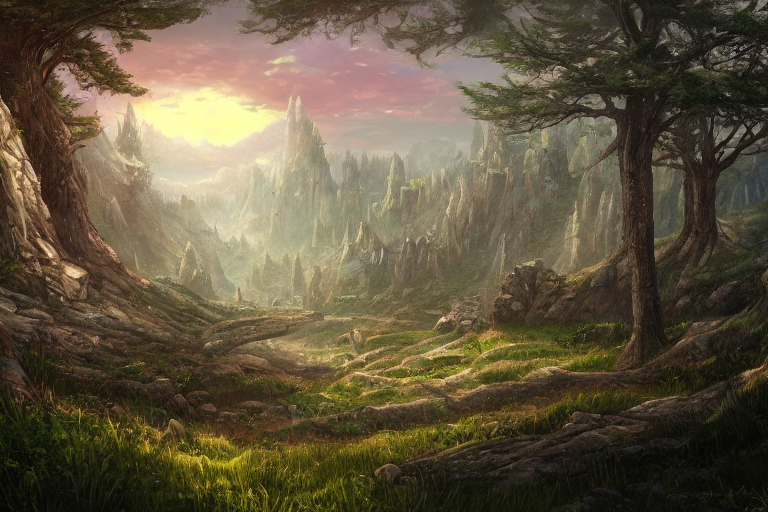

In [ ]:
common_kwargs = {"seed": 2483964025, "width": 768}

prompt = "A fantasy landscape with a pine forest, trending on artstation"
image_origin = stable_diffusion(prompt, **common_kwargs)
image_origin

Ê¨°„Å´ÁîüÊàê„Åó„ÅüÁîªÂÉè„Å´ÂØæ„Åó„Å¶ `fantasy` Ë¶ÅÁ¥†„ÇíÊ∂à„Åó„Å¶„Åø„Çà„ÅÜ„Å®ÊÄù„ÅÑ„Åæ„Åô„ÄÇ`fantasy` „ÅØ 2 Áï™ÁõÆ„ÅÆ„Éà„Éº„ÇØ„É≥„Åß„ÅÇ„Å£„Åü„Åü„ÇÅ„ÄÅ2 „ÇíÊåáÂÆö„Åó„Å§„Å§„ÄÅ„Åù„ÅÆÂΩ±ÈüøÂ∫¶„Çí‰∏ã„Åí„Çã -8 „ÇíÈáç„Åø„Å®„Åó„Å¶ÊåáÂÆö„Åó„Åæ„Åô„ÄÇ

In [ ]:
image_edited = stable_diffusion(
    prompt="A fantasy landscape with a pine forest, trending on artstation",
    prompt_edit_token_weights=[(2, -8)],
    **common_kwargs
)
image_grid([image_origin, image_edited], rows=1, cols=2)

Output hidden; open in https://colab.research.google.com to view.

‰ª•‰∏ä„ÅÆ„Çà„ÅÜ„Å´„ÄÅ„Çà„Çä„É™„Ç¢„É´„Å™Ê£Æ„ÅÆÁîªÂÉè„ÅåÁîüÊàê„Åï„Çå„Åæ„Åó„Åü„ÄÇ

Ê¨°„Å´ `winter` „Å®„ÅÑ„ÅÜÂçòË™û„Çí„Éó„É≠„É≥„Éó„Éà„Å´ËøΩÂä†„Åô„Çã„Åì„Å®„Åß„ÄÅÁîüÊàêÁîªÂÉè„ÇíÂÜ¨„ÅÆÊôØËâ≤„Å´„Åó„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ

In [ ]:
prompt =      "A fantasy landscape with a pine forest, trending on artstation"
prompt_edit = "A winter fantasy landscape with a pine forest, trending on artstation"

image_edited = stable_diffusion(
    prompt=prompt,
    prompt_edit=prompt_edit,
    **common_kwargs,
)
image_grid([image_origin, image_edited], rows=1, cols=2)

Output hidden; open in https://colab.research.google.com to view.

ÊåáÂÆö„Åó„Åü„Å®„Åä„Çä„Å´ÂÖÉ„ÄÖ„ÅÆÁîüÊàêÁîªÂÉè„Å´ÂØæ„Åó„Å¶Èõ™„ÅåÈôç„Å£„Åü„Çà„ÅÜ„Å™ÁîªÂÉè„ÇíÁîüÊàê„Åô„Çã„Åì„Å®„Åå„Åß„Åç„Åæ„Åó„Åü„ÄÇ

Ê¨°„ÅØÊ∞¥ÂΩ©Áîª„ÅÆ„Çà„ÅÜ„Å™„Çπ„Çø„Ç§„É´„ÅßÁîüÊàêÁîªÂÉè„ÇíÂ§âÊõ¥„Åó„Å¶„ÇÇ„Çâ„Åä„ÅÜ„Å®ÊÄù„ÅÑ„Åæ„Åô„ÄÇ

In [ ]:
prompt      = "A fantasy landscape with a pine forest, trending on artstation"
prompt_edit = "A watercolor painting of a landscape with a pine forest, trending on artstation"

image_edited = stable_diffusion(
    prompt=prompt,
    prompt_edit=prompt_edit,
    **common_kwargs,
)
image_grid([image_origin, image_edited], rows=1, cols=2)

Output hidden; open in https://colab.research.google.com to view.

„Ç™„É™„Ç∏„Éä„É´„ÅÆÁîªÂÉè„Å´ÂØæ„Åó„Å¶Ê∞¥ÂΩ©Áîª„ÅÆ„Çà„ÅÜ„Å™„Çπ„Çø„Ç§„É´„ÅÆÁîªÂÉè„ÅåÁîüÊàê„Åï„Çå„Åæ„Åó„Åü„ÄÇ

Ê¨°„ÅØÈúß `fog` „ÇíÁîüÊàêÁîªÂÉè„Åã„ÇâÂèñ„ÇäÈô§„Åè„Çà„ÅÜ„Å´Á∑®ÈõÜ„Åó„Å¶„Åø„Åæ„Åô„ÄÇ`fog` „ÅÆ‰ΩçÁΩÆ„ÅØ `prompt_token` Èñ¢Êï∞„Çí‰Ωø„Å£„Å¶ 9 Áï™ÁõÆ„Åß„ÅÇ„Çã„Å®ÁâπÂÆö„Åß„Åç„Åæ„Åô„ÄÇPrompt-to-Prompt Áî®„Å´Áî®ÊÑè„Åó„Åü `stable_diffusion` Èñ¢Êï∞„ÅÆ `prompt_edit_token_weight` ÂºïÊï∞„Å´ `[(fog „ÅÆ‰ΩçÁΩÆ, „Åù„ÅÆ„Éà„Éº„ÇØ„É≥„ÅÆÈáç„Åø)]` „ÅÆÂΩ¢Âºè„Åß„ÄÅ`fog` „ÅÆÂΩ±Èüø„ÅåÂ∞è„Åï„Åè„Å™„Çã„Çà„ÅÜ„Å´ -6 „ÇíË®≠ÂÆö„Åó„Å¶„Åø„Åæ„Åó„Åü„ÄÇ

In [ ]:
prompt =      "A fantasy landscape with a pine forest, trending on artstation"
prompt_edit = "A fantasy landscape with a pine forest with fog, trending on artstation"

target_token = prompt_token(prompt_edit, 9)
print(f"Target token of the edit: {target_token}")

image_edited = stable_diffusion(
    prompt=prompt,
    prompt_edit=prompt_edit,
    prompt_edit_token_weights=[(9, -6)],
    **common_kwargs,
)
image_grid([image_origin, image_edited], rows=1, cols=2)

Output hidden; open in https://colab.research.google.com to view.

ÂÖÉ„ÄÖ„ÅÆÁîüÊàêÁîªÂÉè„Åã„ÇâÈúß„ÇíÂèñ„ÇäÈô§„ÅÑ„Åü„Çà„ÅÜ„Å™ÁîªÂÉè„ÅåÁîüÊàê„Åï„Çå„Åæ„Åó„Åü„ÄÇ

Ê¨°„ÅØÈúß `fog` „Å´Âä†„Åà„Å¶„ÄÅÂ≤© `rock` „ÇÇÂèñ„ÇäÈô§„ÅÑ„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ`prompt_token` Èñ¢Êï∞„ÅßÂØæË±°„ÅÆ„Éà„Éº„ÇØ„É≥„ÅÆ‰ΩçÁΩÆ„ÇíÁ¢∫Ë™ç„Åó„ÄÅ`prompt_edit_token_weights` „Å´„Éà„Éº„ÇØ„É≥‰ΩçÁΩÆ„Å®„Åù„ÅÆÈáç„Åø„ÇíË®≠ÂÆö„Åó„Å¶ÁîªÂÉè„ÇíÁîüÊàê„Åó„Å¶„Åø„Åæ„Åô„ÄÇ

In [18]:
prompt      = "A fantasy landscape with a pine forest, trending on artstation"
prompt_edit = "A fantasy landscape with a pine forest with fog and rocks, trending on artstation"

target_token = prompt_token(prompt_edit, 9)
print(f"Target token of the edit: {target_token}")

target_token = prompt_token(prompt_edit, 11)
print(f"Target token of the edit: {target_token}")

image_edited = stable_diffusion(
    prompt=prompt,
    prompt_edit=prompt_edit,
    prompt_edit_token_weights=[(9, -6), (11, -6)],
    **common_kwargs,
)
image_grid([image_origin, image_edited], rows=1, cols=2)

Output hidden; open in https://colab.research.google.com to view.

ÂÖÉ„ÄÖ„ÅÆÁîüÊàêÁîªÂÉè„Åã„ÇâÈúß„Å®Â≤©„ÇíÂèñ„ÇäÈô§„ÅÑ„Åü„Çà„ÅÜ„Å™ÁîªÂÉè„ÅåÁîüÊàê„Åï„Çå„Åæ„Åó„Åü„ÄÇ

ÊúÄÂæå„Å´ÁîüÊàêÁîªÂÉè„Å´Â∑ù„ÇíËøΩÂä†„Åó„Å¶„Åø„Åæ„Åó„Çá„ÅÜ„ÄÇ`prompt_edit_spatial_end` „Åß„ÅØÂ§ßÂüüÁöÑ„Å™Á∑®ÈõÜ„Çí„Çà„ÇäÂ§ß„Åç„Å™ÂÄ§„ÇíË®≠ÂÆö„Åô„Çã„Åì„Å®„ÅßÂèçÊò†„Åï„Åõ„Çã„Åì„Å®„ÅåÂèØËÉΩ„Åß„Åô„ÄÇ

In [19]:
prompt      = "A fantasy landscape with a pine forest, trending on artstation"
prompt_edit = "A fantasy landscape with a pine forest and a river, trending on artstation"

image_edited = stable_diffusion(
    prompt=prompt,
    prompt_edit=prompt_edit,
    prompt_edit_spatial_end=0.8,
    **common_kwargs,
)

image_grid([image_origin, image_edited], rows=1, cols=2)

Output hidden; open in https://colab.research.google.com to view.

‰ª•‰∏ä„ÅÆ„Çà„ÅÜ„Å´„Åó„Å¶ Prompt-to-Prompt „ÅÆÂãï‰Ωú„ÇíÁ¢∫Ë™ç„Åó„Åæ„Åó„Åü„ÄÇÂÖÉ„ÄÖ„ÅÆ„Éó„É≠„É≥„Éó„Éà„ÇíÂèÇËÄÉ„Å´ÂçòË™û„ÅÆÂÖ•„ÇåÊõø„Åà„ÇÑ token, attention „ÅÆÈáç„Åø‰ªò„Åë„ÇíÂ§â„Åà„Çã„Å™„Å©„Åó„Å¶ÊüîËªü„Å´ÁîüÊàêÁîªÂÉè„ÇíÁ∑®ÈõÜ„Åô„Çã„Åì„Å®„ÅåÂèØËÉΩ„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç„Åó„Åæ„Åó„Åü„ÄÇ